<center> <font size = 5> Searching for the most reliable model for the "Absenteeism at work" dataset. </font> </center>

### <font size = 5> Table of content: </font> <br>
- [Multiple linear regression model with TensorFlow](#Multiple_linear_regression_with_TensorFlow)
- [Neural network regression model with Keras](#Neural_network_regression_with_Keras)
- [K-Means Clustering](#K_Means_Clustering)
- [Multilabel Classification with TensorFlow](#Multilabel_classification_with_TensorFlow)

<a id='Multiple_linear_regression_with_TensorFlow'></a>
<center> <font size=5> I. Multiple linear regression model with TensorFlow </font></center>

(1) Load data

In [1]:
import pandas as pd
df=pd.read_csv("Absenteeism_at_work.csv",sep=";")
df.head()

,ID,Reason_for_absence,Month_of_absence,Day_of _the_week,Seasons,Transportation_expense,Distance_from_Residence_to_Work,Service_time,Age,Work_load,...,Disciplinary_failure,Education,Son,Social_drinker,Social_smoker,Pet,Weight,Height,Body_mass_index,Absenteeism_time_in_hours
0,11,26,7,3,1,289,36,13,33,239.554,...,0,1,2,1,0,1,90,172,30,4
1,36,0,7,3,1,118,13,18,50,239.554,...,1,1,1,1,0,0,98,178,31,0
2,3,23,7,4,1,179,51,18,38,239.554,...,0,1,0,1,0,0,89,170,31,2
3,7,7,7,5,1,279,5,14,39,239.554,...,0,1,2,1,1,0,68,168,24,4
4,11,23,7,5,1,289,36,13,33,239.554,...,0,1,2,1,0,1,90,172,30,2


The dataset has 740 rows and 21 columns. The last column "Absenteeism time in hours" in our target variables.

The attribute ID has no predictive value. We are going to drop it. By the time we know the reason for absence, the absence already happened. So, to get a realistic predictive value, we are going to drop "Reason_for_absence". We are also going to drop "Height" and "Weight", because of the collinearity between these two attributes and the attribute "body mass index".

(2) Delete redundant columns.

In [2]:
df=df.drop(["ID","Reason_for_absence","Height","Weight"],axis=1)
df

,Month_of_absence,Day_of _the_week,Seasons,Transportation_expense,Distance_from_Residence_to_Work,Service_time,Age,Work_load,Hit_target,Disciplinary_failure,Education,Son,Social_drinker,Social_smoker,Pet,Body_mass_index,Absenteeism_time_in_hours
0,7,3,1,289,36,13,33,239.554,97,0,1,2,1,0,1,30,4
1,7,3,1,118,13,18,50,239.554,97,1,1,1,1,0,0,31,0
2,7,4,1,179,51,18,38,239.554,97,0,1,0,1,0,0,31,2
3,7,5,1,279,5,14,39,239.554,97,0,1,2,1,1,0,24,4
4,7,5,1,289,36,13,33,239.554,97,0,1,2,1,0,1,30,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
735,7,3,1,289,36,13,33,264.604,93,0,1,2,1,0,1,30,8
736,7,3,1,235,11,14,37,264.604,93,0,3,1,0,0,1,29,4
737,0,3,1,118,14,13,40,271.219,95,0,1,1,1,0,8,34,0
738,0,4,2,231,35,14,39,271.219,95,0,1,2,1,0,2,35,0


(3) Create labels for outliers.

In [3]:
# Remove the outliers from the predictor variables
#from sklearn.ensemble import IsolationForest
#clf = IsolationForest(random_state=0).fit(df)
#outlier_label=pd.DataFrame(clf.predict(df))
#outlier_label=outlier_label.rename(columns={0:"outlier_label"})
#outlier_label

from sklearn.covariance import EllipticEnvelope
clf = EllipticEnvelope(random_state=0)
outlier = pd.DataFrame(clf.fit_predict(df))
outlier_label=outlier.rename(columns={0:"outlier_label"})
outlier_label

,outlier_label
0,1
1,1
2,1
3,1
4,1
...,...
735,1
736,1
737,-1
738,1


(4) Remove outliers.

In [4]:
# Concatenate the predictor variables and the outlier column. 
df = pd.concat([df,outlier_label], axis=1, sort=False)
df=df.loc[df["outlier_label"] == 1]
df=df.drop(["outlier_label"],axis=1)
df

,Month_of_absence,Day_of _the_week,Seasons,Transportation_expense,Distance_from_Residence_to_Work,Service_time,Age,Work_load,Hit_target,Disciplinary_failure,Education,Son,Social_drinker,Social_smoker,Pet,Body_mass_index,Absenteeism_time_in_hours
0,7,3,1,289,36,13,33,239.554,97,0,1,2,1,0,1,30,4
1,7,3,1,118,13,18,50,239.554,97,1,1,1,1,0,0,31,0
2,7,4,1,179,51,18,38,239.554,97,0,1,0,1,0,0,31,2
3,7,5,1,279,5,14,39,239.554,97,0,1,2,1,1,0,24,4
4,7,5,1,289,36,13,33,239.554,97,0,1,2,1,0,1,30,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
733,7,4,1,225,26,9,28,264.604,93,0,1,1,0,0,2,24,8
735,7,3,1,289,36,13,33,264.604,93,0,1,2,1,0,1,30,8
736,7,3,1,235,11,14,37,264.604,93,0,3,1,0,0,1,29,4
738,0,4,2,231,35,14,39,271.219,95,0,1,2,1,0,2,35,0


The algorithm removed 74 (= 740 - 666) outlier rows.

(5) Standardize the data.

In [5]:
from sklearn import preprocessing
names=df.columns
scaler=preprocessing.StandardScaler()
df=scaler.fit_transform(df)
df=pd.DataFrame(df,columns=names)
df

/home/jupyterlab/conda/envs/python/lib/python3.6/site-packages/sklearn/preprocessing/data.py:625: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by StandardScaler.
  return self.partial_fit(X, y)
/home/jupyterlab/conda/envs/python/lib/python3.6/site-packages/sklearn/base.py:462: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by StandardScaler.
  return self.fit(X, **fit_params).transform(X)


,Month_of_absence,Day_of _the_week,Seasons,Transportation_expense,Distance_from_Residence_to_Work,Service_time,Age,Work_load,Hit_target,Disciplinary_failure,Education,Son,Social_drinker,Social_smoker,Pet,Body_mass_index,Absenteeism_time_in_hours
0,0.205495,-0.610287,-1.408399,1.034331,0.538981,0.092487,-0.511142,-0.825400,0.645601,-0.239046,-0.433535,1.397538,0.927543,-0.294041,0.286309,0.732319,-0.213123
1,0.205495,-0.610287,-1.408399,-1.461871,-1.080182,1.290865,2.093336,-0.825400,0.645601,4.183300,-0.433535,0.211856,0.927543,-0.294041,-0.621699,0.966689,-0.762747
2,0.205495,0.110371,-1.408399,-0.571413,1.594958,1.290865,0.254881,-0.825400,0.645601,-0.239046,-0.433535,-0.973826,0.927543,-0.294041,-0.621699,0.966689,-0.487935
3,0.205495,0.831029,-1.408399,0.888354,-1.643370,0.332163,0.408085,-0.825400,0.645601,-0.239046,-0.433535,1.397538,0.927543,3.400888,-0.621699,-0.673902,-0.213123
4,0.205495,0.831029,-1.408399,1.034331,0.538981,0.092487,-0.511142,-0.825400,0.645601,-0.239046,-0.433535,1.397538,0.927543,-0.294041,0.286309,0.732319,-0.487935
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
661,0.205495,0.110371,-1.408399,0.100080,-0.165003,-0.866215,-1.277165,-0.181301,-0.398650,-0.239046,-0.433535,0.211856,-1.078118,-0.294041,1.194316,-0.673902,0.336500
662,0.205495,-0.610287,-1.408399,1.034331,0.538981,0.092487,-0.511142,-0.181301,-0.398650,-0.239046,-0.433535,1.397538,0.927543,-0.294041,0.286309,0.732319,0.336500
663,0.205495,-0.610287,-1.408399,0.246056,-1.220979,0.332163,0.101676,-0.181301,-0.398650,-0.239046,2.621856,0.211856,-1.078118,-0.294041,0.286309,0.497949,-0.213123
664,-1.824204,0.110371,-0.503000,0.187666,0.468583,0.332163,0.408085,-0.011213,0.123476,-0.239046,-0.433535,1.397538,0.927543,-0.294041,1.194316,1.904170,-0.762747


Let's separate the predictor variables and target variable.

(6) Separate predictors and target.

In [6]:
X=df.drop(["Absenteeism_time_in_hours"],axis=1)
y=df[["Absenteeism_time_in_hours"]]
print(X.shape[1])
print(y.shape[1])

16
1


(7) Feature selection.

Compute the feature importance scores for each feature. Since the output is numeric, we are going to use the "f_regression" algorithm for feature selection.

In [7]:
# Import the libraries.
from numpy import set_printoptions
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import f_regression

# feature extraction. We are going to output the selection scores for all features and select the features with the highest scores.
test = SelectKBest(score_func=f_regression, k=16)
fit = test.fit(X, y)
features = fit.transform(X)
# summarize scores
set_printoptions(precision=3)

scores=fit.scores_
scores=pd.DataFrame(scores)
scores=scores.rename(columns={0:"scores"})
scores.sort_values(by=["scores"])

/home/jupyterlab/conda/envs/python/lib/python3.6/site-packages/sklearn/utils/validation.py:761: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


,scores
10,0.003096
13,0.020036
5,0.146526
8,0.478875
6,0.568640
2,1.104047
14,1.174234
15,1.538303
0,1.779030
3,2.143773


(8) The most important feature.

In [8]:
print("The most important feature is: ",X.iloc[:,9].name)

The most important feature is:  Disciplinary_failure


(9) The least important feature.

In [9]:
print("The least important feature is: ",X.iloc[:,10].name)

The least important feature is:  Education


(10) The 12 most important features.

In [10]:
#print(X.iloc[:,[1,11,12,4,7,9,0,10,14,13,3,6]].columns)
print(X.iloc[:,[9,1,7,12,11,4,3,0,15,14,2,6]].columns)

Index(['Disciplinary_failure', 'Day_of _the_week', 'Work_load ',
       'Social_drinker', 'Son', 'Distance_from_Residence_to_Work',
       'Transportation_expense', 'Month_of_absence', 'Body_mass_index', 'Pet',
       'Seasons', 'Age'],
      dtype='object')


(11) Select the 12 most important features.

In [11]:
#X=X.iloc[:,[1,9,11,4,6,12,15,10,14,3,8,7]]
X=X.iloc[:,[9,1,7,12,11,4,3,0,15,14,2,6]]
X

,Disciplinary_failure,Day_of _the_week,Work_load,Social_drinker,Son,Distance_from_Residence_to_Work,Transportation_expense,Month_of_absence,Body_mass_index,Pet,Seasons,Age
0,-0.239046,-0.610287,-0.825400,0.927543,1.397538,0.538981,1.034331,0.205495,0.732319,0.286309,-1.408399,-0.511142
1,4.183300,-0.610287,-0.825400,0.927543,0.211856,-1.080182,-1.461871,0.205495,0.966689,-0.621699,-1.408399,2.093336
2,-0.239046,0.110371,-0.825400,0.927543,-0.973826,1.594958,-0.571413,0.205495,0.966689,-0.621699,-1.408399,0.254881
3,-0.239046,0.831029,-0.825400,0.927543,1.397538,-1.643370,0.888354,0.205495,-0.673902,-0.621699,-1.408399,0.408085
4,-0.239046,0.831029,-0.825400,0.927543,1.397538,0.538981,1.034331,0.205495,0.732319,0.286309,-1.408399,-0.511142
...,...,...,...,...,...,...,...,...,...,...,...,...
661,-0.239046,0.110371,-0.181301,-1.078118,0.211856,-0.165003,0.100080,0.205495,-0.673902,1.194316,-1.408399,-1.277165
662,-0.239046,-0.610287,-0.181301,0.927543,1.397538,0.538981,1.034331,0.205495,0.732319,0.286309,-1.408399,-0.511142
663,-0.239046,-0.610287,-0.181301,-1.078118,0.211856,-1.220979,0.246056,0.205495,0.497949,0.286309,-1.408399,0.101676
664,-0.239046,0.110371,-0.011213,0.927543,1.397538,0.468583,0.187666,-1.824204,1.904170,1.194316,-0.503000,0.408085


The data is now processed. Let's build the regression model using TensorFlow.

(12) Import the libraries for TensorFlow model.

In [11]:
import matplotlib.pyplot as plt
import pylab as pl
import numpy as np
import tensorflow as tf
import matplotlib.patches as mpatches
import matplotlib.pyplot as plt
%matplotlib inline
plt.rcParams['figure.figsize'] = (10, 6)

/home/jupyterlab/conda/envs/python/lib/python3.6/site-packages/tensorflow/python/framework/dtypes.py:519: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint8 = np.dtype([("qint8", np.int8, 1)])
/home/jupyterlab/conda/envs/python/lib/python3.6/site-packages/tensorflow/python/framework/dtypes.py:520: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_quint8 = np.dtype([("quint8", np.uint8, 1)])
/home/jupyterlab/conda/envs/python/lib/python3.6/site-packages/tensorflow/python/framework/dtypes.py:521: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint16 = np.dtype([("qint16", np.int16, 1)])
/home/jupyterlab/conda/envs/python/lib/python3

(13) Build the multiple linear regression model with TensorFlow

In [12]:
X=np.matrix(X.values)
y=np.matrix(y.values)

x_data=X.transpose()
y_data=y.transpose()

n=12

# Define data placeholders
x = tf.placeholder(tf.float32, shape=(n, None))
y = tf.placeholder(tf.float32, shape=(1, None))

# Define trainable variables
A = tf.get_variable("A", shape=(1, n))
b = tf.get_variable("b", shape=())

# Define model output
y_predicted = tf.matmul(A, x) + b

# Define the loss function
L = tf.reduce_sum((y_predicted - y)**2)

# Define optimizer object
optimizer = tf.train.AdamOptimizer(learning_rate=0.001).minimize(L)

# Create a session and initialize variables
session = tf.Session()
session.run(tf.global_variables_initializer())

# Main optimization loop
loss_values=[]
for t in range(10000):
    _, current_loss, current_A, current_b = session.run([optimizer, L, A, b], feed_dict={
        x: x_data,
        y: y_data
    })
    loss_values.append(current_loss)
    if t %1000 == 0:
        print("t = %g, loss = %g, A = %s, b = %g" % (t, current_loss, str(current_A), current_b))

t = 0, loss = 2257.45, A = [[-0.075  0.066  0.665  0.208  0.302 -0.635  0.023  0.292  0.302  0.584
   0.167  0.41 ]], b = 0.661201
t = 1000, loss = 695.164, A = [[-0.14  -0.156  0.136 -0.08   0.091 -0.015 -0.059 -0.049 -0.071  0.095
   0.02   0.021]], b = 0.0607299
t = 2000, loss = 681.631, A = [[-0.136 -0.15   0.077 -0.131  0.087  0.115 -0.109 -0.038 -0.008  0.046
   0.023  0.017]], b = 0.000364673
t = 3000, loss = 681.604, A = [[-0.136 -0.15   0.076 -0.133  0.087  0.121 -0.11  -0.036 -0.003  0.042
   0.023  0.017]], b = 2.14451e-08
t = 4000, loss = 681.604, A = [[-0.136 -0.15   0.076 -0.133  0.087  0.121 -0.11  -0.036 -0.003  0.042
   0.023  0.017]], b = -1.83518e-10
t = 5000, loss = 681.604, A = [[-0.136 -0.15   0.076 -0.133  0.087  0.121 -0.11  -0.036 -0.003  0.042
   0.023  0.017]], b = -6.59867e-09
t = 6000, loss = 681.604, A = [[-0.136 -0.15   0.076 -0.133  0.087  0.121 -0.11  -0.036 -0.003  0.042
   0.023  0.017]], b = -7.82964e-09
t = 7000, loss = 681.604, A = [[-0.136 -0.15  

(14) Visulize the loss of the model.

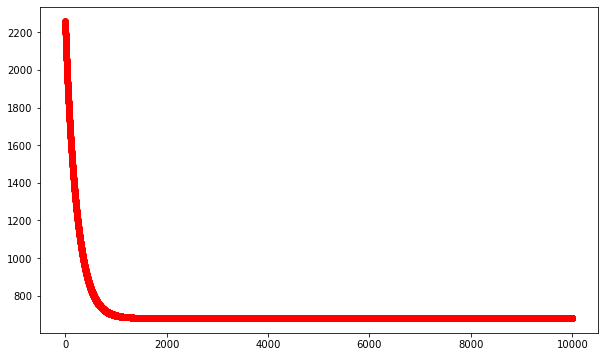

In [13]:
import matplotlib.pyplot as plt
plt.plot(loss_values, 'ro')

(15) Compute the correlation between the actual y values and the predicted y values.

In [14]:
X=np.asarray(X)
X=X.T

A =np.array([[-0.136, -0.15 ,  0.076, -0.133 , 0.087 , 0.121, -0.11 , -0.036, -0.003 , 0.042,
   0.023 , 0.017]])
b=-1.36056e-08
y_pred=A@X+b
coeff=np.corrcoef(y_data,y_pred)
coeff

array([[1.   , 0.281],
       [0.281, 1.   ]])

<a id='Neural_network_regression_with_Keras'></a>
<center><font size=5> II. Neural network regression model with Keras </font></center>

The correlation coefficient between the predicted absenteeism hours and the actual hours is only 0.281. The multiple linear regression model with TensorFlow did not produce very satisfactory output. Let's try a neural network regression model with Keras. **To do that, we are going to re-run the code blocks (1) - (11) and skip (12) - (15).**

(16) Import libraries for Keras

In [12]:
import keras
from keras.models import Sequential
from keras.layers import Dense

Using TensorFlow backend.
/home/jupyterlab/conda/envs/python/lib/python3.6/site-packages/tensorflow/python/framework/dtypes.py:519: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint8 = np.dtype([("qint8", np.int8, 1)])
/home/jupyterlab/conda/envs/python/lib/python3.6/site-packages/tensorflow/python/framework/dtypes.py:520: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_quint8 = np.dtype([("quint8", np.uint8, 1)])
/home/jupyterlab/conda/envs/python/lib/python3.6/site-packages/tensorflow/python/framework/dtypes.py:521: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint16 = np.dtype([("qint16", np.int16, 1)])
/home/jupyterlab/con

(16) Define the neural network regression model.

In [13]:
num_cols=X.shape[1]
def regression_model():
    # create model
    model = Sequential()
    model.add(Dense(110, activation='relu', input_shape=(num_cols,)))
    model.add(Dense(110, activation='relu'))
    model.add(Dense(110, activation ='relu'))
    model.add(Dense(110,activation='tanh'))
    model.add(Dense(1))
    model.compile(optimizer='adam', loss='mean_squared_error')
    return model

(17) Build the model

In [14]:
model = regression_model()

(18) Fit the neural network regression model.

In [16]:
model.fit(X, y, validation_split=0.35, epochs=12, verbose=2)

Train on 432 samples, validate on 234 samples
Epoch 1/12
 - 0s - loss: 0.5971 - val_loss: 0.6678
Epoch 2/12
 - 0s - loss: 0.5758 - val_loss: 0.6290
Epoch 3/12
 - 0s - loss: 0.5494 - val_loss: 0.6869
Epoch 4/12
 - 0s - loss: 0.5386 - val_loss: 0.7075
Epoch 5/12
 - 0s - loss: 0.5002 - val_loss: 0.6722
Epoch 6/12
 - 0s - loss: 0.5117 - val_loss: 0.7551
Epoch 7/12
 - 1s - loss: 0.5366 - val_loss: 0.6593
Epoch 8/12
 - 0s - loss: 0.6053 - val_loss: 0.8618
Epoch 9/12
 - 0s - loss: 0.4861 - val_loss: 0.6383
Epoch 10/12
 - 0s - loss: 0.4511 - val_loss: 0.6955
Epoch 11/12
 - 0s - loss: 0.4213 - val_loss: 0.6936
Epoch 12/12
 - 0s - loss: 0.4181 - val_loss: 0.5846


(19) Visualize how the predicted absenteeism hours compare to the actual absenteeism hours.

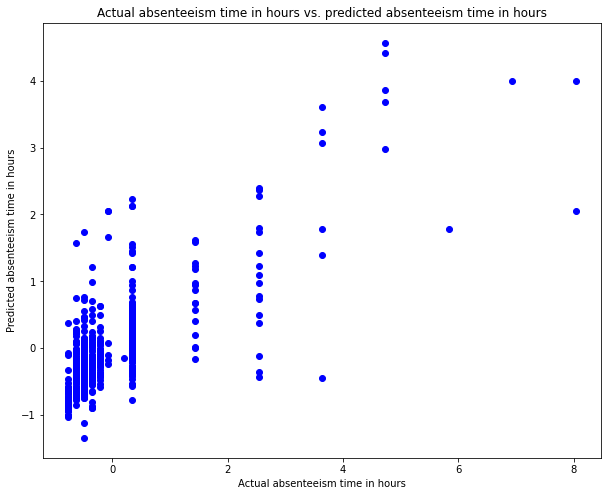

In [18]:
import matplotlib.pyplot as plt
y_pred=model.predict(X)
plt.figure(figsize=(10,8))
plt.scatter(y, y_pred,color='blue')
plt.title('Actual absenteeism time in hours vs. predicted absenteeism time in hours')
plt.xlabel('Actual absenteeism time in hours')
plt.ylabel('Predicted absenteeism time in hours')
plt.show()

That was a very bold try. The "Absenteeims at work" dataset was not meant to be used for building regression model. It was originally used for post-graduate research at Universidade Nove de Julho in Brazil. The associated machine learning tasks are clustering and classification. There have been lots of research papers about researh on this dataset. The researchers categorized the target attribute "absenteeism time in hour" into several classes and built classification models. There was one papaer that the researched categoried target attribute into 3 classes (=0, > 0 but <= 10, >10) and claimed that by using a Random Forest classification model, the research attained an accuracy of 91%. There was also another paper in which the researcher categorized the target attribute into 5 classes (hours < 2, 2 <= hours <5, 5 <= hours <10, 10 <= hours < 80, hours >= 80) and claimed that the neural network model built this way had an accuracy of 58%. Neither research attained very satisfactory ressults. The first research classified the target attribute too  broadly and thus had limited predictive values. The second research did a more detailed classification but the accuracy was rather low. 

It seems that the main challenge with this dataset is that you either have to sacrifice practical predictive values for high accuracy or sacrifice high accuracy for more practical predictive values.

**I am going to make two more bold tries: (1) build a clustering model and (2) a classification model and see if I can do better than the researchers who had published papaers on research done on this dataset.**

I did a presenetation on this dataset for an online course at Coursera that I am currently enrolled in. My peers from that course commented that the subject was not important enough, would not generate big business values and that they were not convinced. They might be business people with no (or very limited) background in data science or machine learning. The subject (and the "absenteeism at work" dataset as well) is obviously very well-known in the machine learning research community or the academic community. The dataset itself is intriguing in the sense that it seems to present insurmountable challenge for the researchers. As for the subject "Absenteeism at work", it IS a huge human resource management challlenge for almost every organization. (Of course, I would not engage in such arguments with my peers. I prefer to devote my time to tackcle the tasks on hand. **I think my work will speak for itself.^^_**)

<a id='K_Means_Clustering'></a>
<center> <font size =5> III. K-Means Clustering </font><center>

(20) K-Means on the cleaned dataset with outlier removal, feature selection and standardization.

In [23]:
# Calculate the average silhouette score to determine the "good number" of clusters.
df_cleaned=pd.concat([X,y],axis=1)
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_samples, silhouette_score
for n_clusters in range(2,20):
    clusterer = KMeans(n_clusters=n_clusters, random_state=10)
    cluster_labels = clusterer.fit_predict(df_cleaned)

    # The silhouette_score gives the average value for all the samples.
    # This gives a perspective into the density and separation of the formed
    # clusters
    silhouette_avg = silhouette_score(df_cleaned, cluster_labels)
    print("For n_clusters =", n_clusters,
          "The average silhouette_score is :", silhouette_avg)

    # Compute the silhouette scores for each sample
    sample_silhouette_values = silhouette_samples(df_cleaned, cluster_labels)

For n_clusters = 2 The average silhouette_score is : 0.1367961629798646
For n_clusters = 3 The average silhouette_score is : 0.15007951698757202
For n_clusters = 4 The average silhouette_score is : 0.17519944116069275
For n_clusters = 5 The average silhouette_score is : 0.1784301077650526
For n_clusters = 6 The average silhouette_score is : 0.1858612740395457
For n_clusters = 7 The average silhouette_score is : 0.2061561360511031
For n_clusters = 8 The average silhouette_score is : 0.19258632091931616
For n_clusters = 9 The average silhouette_score is : 0.20721602884872353
For n_clusters = 10 The average silhouette_score is : 0.20457870460032523
For n_clusters = 11 The average silhouette_score is : 0.20405707140462487
For n_clusters = 12 The average silhouette_score is : 0.22681349575806198
For n_clusters = 13 The average silhouette_score is : 0.2195322287776138
For n_clusters = 14 The average silhouette_score is : 0.2270257743991643
For n_clusters = 15 The average silhouette_score is 

Silhouette scors for n = 2 to 19 are all very low. It seems that we are not going to get a good number of clusters on the cleaned dataset with outliers removal, feature selection and standardization. Let's try K-means on the original dataset. A biggest challenge this data set presents for K-Means clustering analysis is that a lot of its variables are indeed categorical, although they have been given integer labels. The K-Means algorithm that is based on Euclidean distance is not really meaningful with categorical variables, but assigning integer labels to those variables still allows us to use the algorithm to perform K-Means clustering.

(21) K-Means on the original dataset.

In [24]:
# Calculate the average silhouette score to determine the "good number" of clusters.
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_samples, silhouette_score
range_n_clusters = [2, 3, 4, 5, 6,7,8,9,10]
for n_clusters in range_n_clusters:
    clusterer = KMeans(n_clusters=n_clusters, random_state=10)
    cluster_labels = clusterer.fit_predict(df)

    # The silhouette_score gives the average value for all the samples.
    # This gives a perspective into the density and separation of the formed
    # clusters
    silhouette_avg = silhouette_score(df, cluster_labels)
    print("For n_clusters =", n_clusters,
          "The average silhouette_score is :", silhouette_avg)

    # Compute the silhouette scores for each sample
    sample_silhouette_values = silhouette_samples(df, cluster_labels)

For n_clusters = 2 The average silhouette_score is : 0.14982941294759924
For n_clusters = 3 The average silhouette_score is : 0.15117946637496227
For n_clusters = 4 The average silhouette_score is : 0.16557281346641337
For n_clusters = 5 The average silhouette_score is : 0.16332873706040926
For n_clusters = 6 The average silhouette_score is : 0.1890021936122242
For n_clusters = 7 The average silhouette_score is : 0.20238195267956527
For n_clusters = 8 The average silhouette_score is : 0.19825248922612987
For n_clusters = 9 The average silhouette_score is : 0.20635035288518652
For n_clusters = 10 The average silhouette_score is : 0.2284563099055256


No luck with the original dataset either. Is it just not possible to perform K-means clustering on the "Absenteeism at work" dataset? No. silhouette score is NOT the only way to determine what is the optimal number of clusters. The optimal number of clusters depends on the purpose of the task on hand. I personally have seen cases where the optimal number of clusters determined by the algorithm is not meaningful for the purpose of task on hand. Such is especially true in business settings. The optimal number of cluster is often determined by whether clustering the data in a certain way will improve operational efficiency and whether it is practical from managerial and executional perspective. If it is not practical from managerial and/or executional perspectives, it is essentially useless. So, the "Absenteeism at work" dataset is not completely hopeless. Instead of relying on the algorithm to determine what should be the number of clusters, we are going to manually cluster the dataset. For example, we will cluster employees who were never absent together, employees with absence time less than or equal to 8 hours in another group, and so on. 

<a id='Multilabel_classification_with_TensorFlow'></a>
<center> <font size =5 > IV. The multilabel classification model with TensorFlow. </font> </center>

To mannually cluster the "Absenteeism at work" dataset, I am going to write some SQL queries. In order to be able to write SQL queries in this Jupyter notebook, I need to upload the dataset to IBM's Db2 and connect to my IBM Db2 account. 

(22) Import IBM Db and load the SQL extension.

In [3]:
import ibm_db
%load_ext sql

(23) Connect to the IBM database.

In [1]:
# I have to clear this cell and its output, since it contains everything neede to connect to IBM's Db2 through my account.

I will use the following criteria to manually cluster the dataset: <br>
- Absenteeism hours = 0: 0
- 0 < Absenteeism hours <= 8: 1
- 8 < Absenteeism hours <= 16: 2
- 16 < Absenteeism hours <=24: 3
- 24 < Absenteeism hours <= 32: 4
- 32 < Absenteeism hours <= 40: 5
- Absenteeism hours > 40: 6

So, there will be 7 classes: 0,1,2,3,4,5,6,7. Each class represents the number of 8-hour workdays that an employee was absent for. There are a few employees who were absent for more than six 8-hour workdays.However, dividing the dataset in a way that is unnecessarily detailed might make the model more difficult to train and compromise accuracy. 

(24) Write the SQL query to manually cluster the dataset.

In [ ]:
df_new = %sql SELECT *, CASE WHEN Absenteeism_time_in_hours= 0 THEN 0 WHEN AND(Absenteeism_time_in_hours>0,Absenteeism_time_in_hours<=8) THEN 1 WHEN AND(Absenteeism_time_in_hours>8,Absenteeism_time_in_hours<=16) THEN 2 WHEN AND(Absenteeism_time_in_hours>16, Absenteeism_time_in_hours<=24) THEN 3 WHEN AND(Absenteeism_time_in_hours>24, Absenteeism_time_in_hours<=32) THEN 4 WHEN AND(Absenteeism_time_in_hours>32, Absenteeism_time_in_hours<=40) THEN 5 ELSE 6 END AS Absenteeism_category from Absenteeism_at_work
# I cleared the output of this cell, since it contains everything needed to connect to Db2 through my account as well.

(25) Output the query result to .csv format file.

In [19]:
df_new.csv("df_new.csv")

CSV results at /resources/labs/ML0120EN/df_new.csv

(26) Load the clustered dataset as pandas dataframe.

In [110]:
import pandas as pd
df_new=pd.read_csv("df_new.csv")
df_new.head()

,id,reason_for_absence,month_of_absence,day_of__the_week,seasons,transportation_expense,distance_from_residence_to_work,service_time,age,work_load,...,education,son,social_drinker,social_smoker,pet,weight,height,body_mass_index,absenteeism_time_in_hours,absenteeism_category
0,11,26,7,3,1,289,36,13,33,239.554,...,1,2,1,0,1,90,172,30,4,1
1,36,0,7,3,1,118,13,18,50,239.554,...,1,1,1,0,0,98,178,31,0,0
2,3,23,7,4,1,179,51,18,38,239.554,...,1,0,1,0,0,89,170,31,2,1
3,7,7,7,5,1,279,5,14,39,239.554,...,1,2,1,1,0,68,168,24,4,1
4,11,23,7,5,1,289,36,13,33,239.554,...,1,2,1,0,1,90,172,30,2,1


We see that there is a new column "absenteeism_category". We do not need the column "absenteeism_time_in_hours" anymore. So, we are going to drop that column.

(27) Drop the "Absenteeism_time_in_hours" column.

We are also going to drop the "id" column, which has no predictive value. We will drop the "reason_for_absence" column as well. By the time we know the reason for absence, the absence would have already happened. So, to get a realistic model with predictive value, we need to drop the "reason_for_absence" column as well.Finally, we will also exclude "Weight" and "Height" because of the collinearity between these two attributes and the attribute "Body mass index".

In [111]:
df_new=df_new.drop(["id","reason_for_absence","absenteeism_time_in_hours","weight","height"],axis=1)
df_new.head()

,month_of_absence,day_of__the_week,seasons,transportation_expense,distance_from_residence_to_work,service_time,age,work_load,hit_target,disciplinary_failure,education,son,social_drinker,social_smoker,pet,body_mass_index,absenteeism_category
0,7,3,1,289,36,13,33,239.554,97,0,1,2,1,0,1,30,1
1,7,3,1,118,13,18,50,239.554,97,1,1,1,1,0,0,31,0
2,7,4,1,179,51,18,38,239.554,97,0,1,0,1,0,0,31,1
3,7,5,1,279,5,14,39,239.554,97,0,1,2,1,1,0,24,1
4,7,5,1,289,36,13,33,239.554,97,0,1,2,1,0,1,30,1


(28) Seperate the predictor variables and the target variables.

In [112]:
df_new_X=df_new.drop(["absenteeism_category"],axis=1)
Y=df_new[["absenteeism_category"]]

(29) Normalize the predictor variables.

In [113]:
from sklearn import preprocessing
names=df_new_X.columns
scaler=preprocessing.StandardScaler()
X=scaler.fit_transform(df_new_X)
X=pd.DataFrame(X,columns=names)
X

/home/jupyterlab/conda/envs/python/lib/python3.6/site-packages/sklearn/preprocessing/data.py:625: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by StandardScaler.
  return self.partial_fit(X, y)
/home/jupyterlab/conda/envs/python/lib/python3.6/site-packages/sklearn/base.py:462: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by StandardScaler.
  return self.fit(X, **fit_params).transform(X)


,month_of_absence,day_of__the_week,seasons,transportation_expense,distance_from_residence_to_work,service_time,age,work_load,hit_target,disciplinary_failure,education,son,social_drinker,social_smoker,pet,body_mass_index
0,0.196763,-0.643947,-1.390175,1.011408,0.429556,0.101770,-0.532868,-0.818212,0.638686,-0.239046,-0.433857,0.893723,0.872872,-0.280566,0.192850,0.775932
1,0.196763,-0.643947,-1.390175,-1.544379,-1.121694,1.242825,2.092860,-0.818212,0.638686,4.183300,-0.433857,-0.017234,0.872872,-0.280566,-0.566240,1.009438
2,0.196763,0.059924,-1.390175,-0.632665,1.441240,1.242825,0.239405,-0.818212,0.638686,-0.239046,-0.433857,-0.928191,0.872872,-0.280566,-0.566240,1.009438
3,0.196763,0.763796,-1.390175,0.861947,-1.661258,0.329981,0.393859,-0.818212,0.638686,-0.239046,-0.433857,0.893723,0.872872,3.564226,-0.566240,-0.625100
4,0.196763,0.763796,-1.390175,1.011408,0.429556,0.101770,-0.532868,-0.818212,0.638686,-0.239046,-0.433857,0.893723,0.872872,-0.280566,0.192850,0.775932
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
735,0.196763,-0.643947,-1.390175,1.011408,0.429556,0.101770,-0.532868,-0.176427,-0.420423,-0.239046,-0.433857,0.893723,0.872872,-0.280566,0.192850,0.775932
736,0.196763,-0.643947,-1.390175,0.204318,-1.256585,0.329981,0.084950,-0.176427,-0.420423,-0.239046,2.538869,-0.017234,-1.145644,-0.280566,0.192850,0.542427
737,-1.841698,-0.643947,-1.390175,-1.544379,-1.054248,0.101770,0.548314,-0.006949,0.109131,-0.239046,-0.433857,-0.017234,0.872872,-0.280566,5.506478,1.709954
738,-1.841698,0.059924,-0.490149,0.144533,0.362110,0.329981,0.393859,-0.006949,0.109131,-0.239046,-0.433857,0.893723,0.872872,-0.280566,0.951940,1.943459


I will not use any outlier removal algorithm this time. The way that the original dataset was clustered meant to include all data points.

(30) Feature importance scores.

In [114]:
# Import the libraries.
from numpy import set_printoptions
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import f_classif

# feature extraction. We are going to output the selection scores for all features and select the features with the highest scores.
test = SelectKBest(score_func=f_classif, k="all")
fit = test.fit(X, Y)
features = fit.transform(X)
# summarize scores
set_printoptions(precision=3)

# Sort the feature scores in ascending order.
scores=fit.scores_
scores=pd.DataFrame(scores)
scores=scores.rename(columns={0:"scores"})
scores.sort_values(by=["scores"])


/home/jupyterlab/conda/envs/python/lib/python3.6/site-packages/sklearn/utils/validation.py:761: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


,scores
5,0.727051
10,1.268992
0,1.307315
14,1.394055
3,1.549275
13,1.784723
15,2.009708
4,2.019795
11,2.038688
12,2.265621


The most important feature is the one with column index 9. The least important feature is the one with column index 5. We can output the column names.

In [115]:
print("The most important feature is: ",X.iloc[:,9].name)

The most important feature is:  disciplinary_failure


In [116]:
print("The least important feature is: ",X.iloc[:,5].name)

The least important feature is:  service_time


(31) Select the 10 most important features.

In [117]:
X=X.iloc[:,[9,7,8,6,1,2,12,11,4,15]]
X

,disciplinary_failure,work_load,hit_target,age,day_of__the_week,seasons,social_drinker,son,distance_from_residence_to_work,body_mass_index
0,-0.239046,-0.818212,0.638686,-0.532868,-0.643947,-1.390175,0.872872,0.893723,0.429556,0.775932
1,4.183300,-0.818212,0.638686,2.092860,-0.643947,-1.390175,0.872872,-0.017234,-1.121694,1.009438
2,-0.239046,-0.818212,0.638686,0.239405,0.059924,-1.390175,0.872872,-0.928191,1.441240,1.009438
3,-0.239046,-0.818212,0.638686,0.393859,0.763796,-1.390175,0.872872,0.893723,-1.661258,-0.625100
4,-0.239046,-0.818212,0.638686,-0.532868,0.763796,-1.390175,0.872872,0.893723,0.429556,0.775932
...,...,...,...,...,...,...,...,...,...,...
735,-0.239046,-0.176427,-0.420423,-0.532868,-0.643947,-1.390175,0.872872,0.893723,0.429556,0.775932
736,-0.239046,-0.176427,-0.420423,0.084950,-0.643947,-1.390175,-1.145644,-0.017234,-1.256585,0.542427
737,-0.239046,-0.006949,0.109131,0.548314,-0.643947,-1.390175,0.872872,-0.017234,-1.054248,1.709954
738,-0.239046,-0.006949,0.109131,0.393859,0.059924,-0.490149,0.872872,0.893723,0.362110,1.943459


(32) Create subsets for train and test purposes.

In [118]:
# split the dataset into train set and test set.
from sklearn.model_selection import train_test_split
X_train, X_test, Y_train, Y_test = train_test_split(X,Y, test_size=0.3,random_state=42)

(33) Create placeholders for the TensorFlow model

In [119]:
import tensorflow as tf
# numFeatures is the number of features in our input data.
# In the iris dataset, this number is '4'.
numFeatures = X_train.shape[1]

# numLabels is the number of classes our data points can be in.
# In the iris dataset, this number is '3'.
numLabels = Y_train.shape[1]


# Placeholders
# 'None' means TensorFlow shouldn't expect a fixed number in that dimension
X = tf.placeholder(tf.float32, [None, numFeatures]) # Iris has 4 features, so X is a tensor to hold our data.
yGold = tf.placeholder(tf.float32, [None, numLabels]) # This will be our correct answers matrix for 3 classes.

(34) Create random weight and bias for the TensorFlow model that will update automatically during the training process.

In [134]:
weights = tf.Variable(tf.random_normal([numFeatures,numLabels],
                                       mean=0,
                                       stddev=0.001,
                                       name="weights"))

bias = tf.Variable(tf.random_normal([1,numLabels],
                                    mean=0,
                                    stddev=0.001,
                                    name="bias"))

(35) Build the components for the TensorFlow model.

In [135]:
apply_weights_OP = tf.matmul(X, weights, name="apply_weights")
add_bias_OP = tf.add(apply_weights_OP, bias, name="add_bias") 
activation_OP = tf.nn.sigmoid(add_bias_OP, name="activation")

(36) Define the cost function and training duration.

In [149]:
numEpochs = 10000

# Defining our learning rate iterations (decay)
learningRate = tf.train.exponential_decay(learning_rate=0.005,
                                          global_step= 1,
                                          decay_steps=X_train.shape[0],
                                          decay_rate= 0.95,
                                          staircase=True)
cost_OP = tf.nn.l2_loss(activation_OP-yGold, name="squared_error_cost")

#Defining our Gradient Descent
training_OP = tf.train.GradientDescentOptimizer(learningRate).minimize(cost_OP)

(37) Create a TensorFlow session and initialize the variables.

In [150]:
# Create a tensorflow session
sess = tf.Session()

# Initialize our weights and biases variables.
init_OP = tf.global_variables_initializer()

# Initialize all tensorflow variables
sess.run(init_OP)



(38) Create operations to keep track of the model's efficiency during the training process.

In [151]:
# argmax(activation_OP, 1) returns the label with the most probability
# argmax(yGold, 1) is the correct label
correct_predictions_OP = tf.equal(tf.argmax(activation_OP,1),tf.argmax(yGold,1))

# If every false prediction is 0 and every true prediction is 1, the average returns us the accuracy
accuracy_OP = tf.reduce_mean(tf.cast(correct_predictions_OP, "float"))

# Summary op for regression output
activation_summary_OP = tf.summary.histogram("output", activation_OP)

# Summary op for accuracy
accuracy_summary_OP = tf.summary.scalar("accuracy", accuracy_OP)

# Summary op for cost
cost_summary_OP = tf.summary.scalar("cost", cost_OP)

# Summary ops to check how variables (W, b) are updating after each iteration
weightSummary = tf.summary.histogram("weights", weights.eval(session=sess))
biasSummary = tf.summary.histogram("biases", bias.eval(session=sess))

# Merge all summaries
merged = tf.summary.merge([activation_summary_OP, accuracy_summary_OP, cost_summary_OP, weightSummary, biasSummary])

# Summary writer
writer = tf.summary.FileWriter("summary_logs", sess.graph)

(39) Train the model and output the final accuracy on the test set.

In [152]:
# Initialize reporting variables
cost = 0
diff = 1
epoch_values = []
accuracy_values = []
cost_values = []

# Training epochs
for i in range(numEpochs):
    if i > 1 and diff < .0001:
        print("change in cost %g; convergence."%diff)
        break
    else:
        # Run training step
        step = sess.run(training_OP, feed_dict={X: X_train, yGold: Y_train})
        # Report occasional stats
        if i % 100 == 0:
            # Add epoch to epoch_values
            epoch_values.append(i)
            # Generate accuracy stats on test data
            train_accuracy, newCost = sess.run([accuracy_OP, cost_OP], feed_dict={X: X_train, yGold: Y_train})
            # Add accuracy to live graphing variable
            accuracy_values.append(train_accuracy)
            # Add cost to live graphing variable
            cost_values.append(newCost)
            # Re-assign values for variables
            diff = abs(newCost - cost)
            cost = newCost

            #generate print statements
            print("step %d, training accuracy %g, cost %g, change in cost %g"%(i, train_accuracy, newCost, diff))


# How well do we perform on held-out test data?
print("final accuracy on test set: %s" %str(sess.run(accuracy_OP, 
                                                     feed_dict={X: X_test, 
                                                                yGold: Y_test})))

step 0, training accuracy 1, cost 301.111, change in cost 301.111
step 100, training accuracy 1, cost 221.056, change in cost 80.0549
step 200, training accuracy 1, cost 220.308, change in cost 0.748093
step 300, training accuracy 1, cost 220.049, change in cost 0.258957
step 400, training accuracy 1, cost 219.917, change in cost 0.132233
step 500, training accuracy 1, cost 219.837, change in cost 0.0804443
step 600, training accuracy 1, cost 219.782, change in cost 0.0542297
step 700, training accuracy 1, cost 219.743, change in cost 0.039093
step 800, training accuracy 1, cost 219.714, change in cost 0.0294952
step 900, training accuracy 1, cost 219.691, change in cost 0.0230865
step 1000, training accuracy 1, cost 219.672, change in cost 0.0185394
step 1100, training accuracy 1, cost 219.657, change in cost 0.0152283
step 1200, training accuracy 1, cost 219.644, change in cost 0.0127716
step 1300, training accuracy 1, cost 219.633, change in cost 0.0108185
step 1400, training accura

We see that by "step 99000" (that is after 10000 epochs), the change in loss begins to stablize. With the parameters defined as above, the model would reach a peak accuracy of 100% at the end of the training, a quite commendable result.

(40) Visualize how the loss behaves.

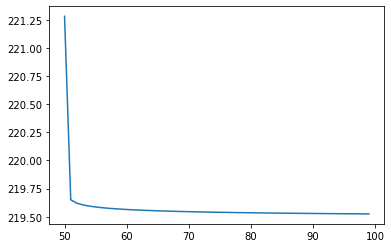

In [153]:
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt
plt.plot([np.mean(cost_values[i-50:i]) for i in range(len(cost_values))])
plt.show()

(41) Output the predicted result to mannually verify that the model did achieve a 100% accuracy.

"sess.run" compares the predicted label with the actual label and outputs True for correct predictions and False for incorrect predictions.

In [154]:
array=sess.run(correct_predictions_OP,feed_dict={X:X_test,yGold:Y_test})
pred=pd.DataFrame(data=array, columns=["Correct=True"])
pred

,Correct=True
0,True
1,True
2,True
3,True
4,True
...,...
217,True
218,True
219,True
220,True


Let's double-check if there is any row that the "sess.run" does not output True. For a 100% accuracy, we would expect that such conditional selection would output nothing.

In [155]:
pred[pred["Correct=True"] != True]

,Correct=True


The conditional selection yields no output. That means the model really correctly predicted all the labels in the test data.